# Testing neural network

## Init

In [1]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("neural_network")
from trainer import Trainer
from nn_model import NNModel
from ann_model import ANNModel
from cnn_model import CNNModel
from t_cnn_model import TCNModel
from hyperparameter_manager import HyperparameterManager
from waveform_batch_manager import WaveformBatchManagerHDF5
import nn_transforms

import datetime
import pandas as pd
import numpy as np

param_manager = HyperparameterManager()

## ANN model

### Init

In [2]:
parameters_ANN = param_manager.get_ann_parameters()
train_set = WaveformBatchManagerHDF5('../data/raw/DatasetOnline/Modulation_4ASK_BPSK_QPSK.hdf5', ['4ASK','BPSK','QPSK'], 128)

trainer_ann = Trainer(ANNModel, parameters_ANN, train_set=train_set, batch_size_=32, num_workers_=2)

#### Train

In [7]:
trainer_ann.eval()

14724
Finished evaluation in 6.71309161 seconds
Accuracy : 0.0


In [3]:
loss_per_epoch = trainer_ann.train(20)

[1,  1000] loss: 0.665
[1,  2000] loss: 0.565
[1,  3000] loss: 0.556



KeyboardInterrupt



In [6]:
# export loss to csv
loss_per_epoch_np = np.array(loss_per_epoch)

DF = pd.DataFrame(loss_per_epoch_np)
DF.to_csv("data1.csv")

[0.57575032 0.4229227  0.35684807 0.34611767 0.33794553 0.33456618
 0.33085053 0.32208924 0.30811652 0.28687986 0.2697212  0.25535789
 0.24418356 0.23315039 0.22607056 0.21943491 0.21489946 0.21032112
 0.20887313 0.20507478]


### Eval Model for each SNR

#### Load model

In [ ]:
ABS_PATH = '~/School/PFE/PFE-A2023-Classification-Modulation/data/nn/ANN'
dir_path = os.path.expanduser(ABS_PATH)
file_name = ''
full_path = os.path.join(dir_path, file_name)
print(full_path)

trainer_ann.load_model(file_name, dir_path)

#### Eval

In [15]:
snrs= range(-2, 22, 2)
accuracy_ann = []
for snr in snrs:
    total_accuracy = 0
    nb_it = 20
    for i in range(nb_it):
        total_accuracy += trainer_ann.eval_by_snr(snr)
    average_accuracy = total_accuracy/nb_it
    accuracy_ann.append(average_accuracy)

print(accuracy_ann)

[0.7265625, 0.828125, 0.85, 0.90625, 0.9203125, 0.928125, 0.95, 0.9546875, 0.9515625, 0.953125, 0.9453125, 0.940625]


In [19]:
accuracy = np.array(accuracy_ann)
DF = pd.DataFrame(accuracy)
DF.to_csv("data1.csv")

#### Plot

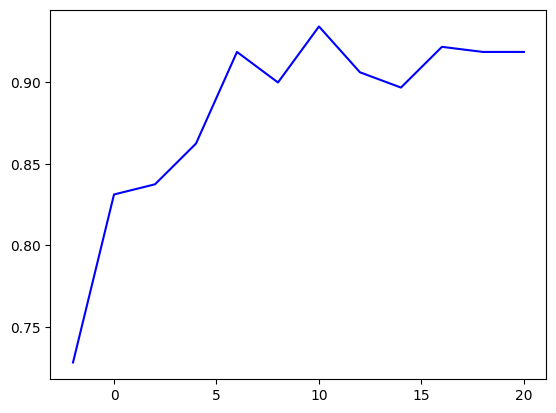

In [16]:
plt.plot(snrs, accuracy_ann, color="blue")

### Save Model

In [17]:
ABS_PATH = '~/School/PFE/PFE-A2023-Classification-Modulation/data/nn/ANN'
dir_path = os.path.expanduser(ABS_PATH)
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
file_name = f'{timestamp}.pt'
full_path = os.path.join(dir_path, file_name)
print(full_path)

trainer_ann.save_model(file_name, dir_path)

/home/will/School/PFE/PFE-A2023-Classification-Modulation/data/nn/ANN/20231203_164814.pt


## CNN model

### Init

In [36]:
parameters_CNN = param_manager.get_cnn_parameters_1d(nb_filter_cnn_A=12,nb_layer_A=3, nb_filter_cnn_B=16, nb_layer_B=5, nb_filter_cnn_C=16, nb_layer_C = 7, learning_rate=0.0005)
transform = nn_transforms.get_transform_to_2d()

train_set = WaveformBatchManagerHDF5('../data/raw/DatasetOnline/Modulation_4ASK_BPSK_QPSK.hdf5', ['4ASK','BPSK','QPSK'], 128, transform=transform)

trainer_cnn = Trainer(CNNModel, parameters_CNN, train_set=train_set, batch_size_=32, num_workers_=2, transform_ = transform)

#### Train

In [37]:
trainer_cnn.eval()

14724
Accuracy : 0.0


In [38]:
loss_per_epoch = trainer_cnn.train(20)

[1,  1000] loss: 1.012
[1,  2000] loss: 0.731
[1,  3000] loss: 0.633
[1,  4000] loss: 0.587
Epoch 1 completed in 177.14 seconds
Loss=0.7348287288384292; Accuracy=59.8113093802749
[2,  1000] loss: 0.551
[2,  2000] loss: 0.516
[2,  3000] loss: 0.482
[2,  4000] loss: 0.463
Epoch 2 completed in 178.14 seconds
Loss=0.5015105441704928; Accuracy=76.36393778635158
[3,  1000] loss: 0.444
[3,  2000] loss: 0.427
[3,  3000] loss: 0.421
[3,  4000] loss: 0.406
Epoch 3 completed in 183.74 seconds
Loss=0.4235215095445165; Accuracy=81.47832770677599
[4,  1000] loss: 0.392
[4,  2000] loss: 0.389
[4,  3000] loss: 0.385
[4,  4000] loss: 0.377
Epoch 4 completed in 188.39 seconds
Loss=0.38533697843062953; Accuracy=83.12560284543044
[5,  1000] loss: 0.366
[5,  2000] loss: 0.364
[5,  3000] loss: 0.358
[5,  4000] loss: 0.351
Epoch 5 completed in 180.39 seconds
Loss=0.3604767753639105; Accuracy=84.27703761755485
[6,  1000] loss: 0.341
[6,  2000] loss: 0.331
[6,  3000] loss: 0.338
[6,  4000] loss: 0.330
Epoch 6 

In [39]:
# export loss to csv
loss_per_epoch_np = np.array(loss_per_epoch)

DF = pd.DataFrame(loss_per_epoch_np)
DF.to_csv("data1.csv")

### Eval Model for each SNR

#### Load model

In [3]:
ABS_PATH = '~/School/PFE/PFE-A2023-Classification-Modulation/data/nn/CNN'
dir_path = os.path.expanduser(ABS_PATH)
file_name = '20231201_113803.pt'
full_path = os.path.join(dir_path, file_name)
print(full_path)

trainer_cnn.load_model(file_name, dir_path)

/home/will/School/PFE/PFE-A2023-Classification-Modulation/data/nn/CNN/20231201_113803.pt


#### Eval

In [40]:
snrs= range(-2, 22, 2)
accuracy_cnn = []
for snr in snrs:
    total_accuracy = 0
    nb_it = 10
    for i in range(nb_it):
        total_accuracy += trainer_cnn.eval_by_snr(snr)
    average_accuracy = total_accuracy/nb_it
    accuracy_cnn.append(average_accuracy)

print(accuracy_cnn)

[0.665625, 0.80625, 0.853125, 0.90625, 0.928125, 0.921875, 0.921875, 0.95, 0.959375, 0.934375, 0.95, 0.93125]


In [41]:
accuracy = np.array(accuracy_cnn)
DF = pd.DataFrame(accuracy)
DF.to_csv("data1.csv")

#### Plot

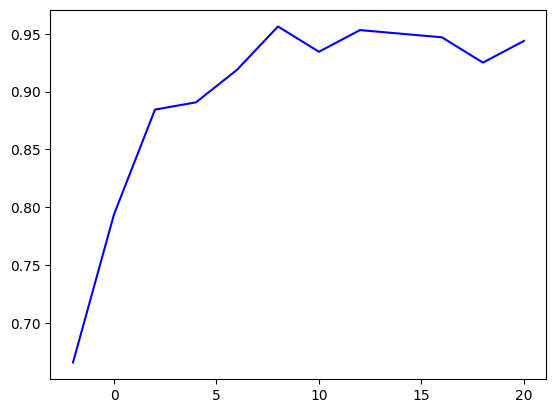

In [5]:
plt.plot(snrs, accuracy_arr, color="blue")

### Save Model

In [42]:
ABS_PATH = '~/School/PFE/PFE-A2023-Classification-Modulation/data/nn/CNN'
dir_path = os.path.expanduser(ABS_PATH)
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
file_name = f'{timestamp}.pt'
full_path = os.path.join(dir_path, file_name)
print(full_path)

trainer_cnn.save_model(file_name, dir_path)

/home/will/School/PFE/PFE-A2023-Classification-Modulation/data/nn/CNN/20231203_211008.pt


## TCN Model

### Init

In [27]:
num_channels = [12,12,12, 8,8,8,8]
parameters_TCNN = param_manager.get_t_cnn_parameters(in_channels=1, num_channels=num_channels, learning_rate=0.0005)
transform = nn_transforms.get_transform_t_cnn()
train_set = WaveformBatchManagerHDF5('../data/raw/DatasetOnline/Modulation_4ASK_BPSK_QPSK.hdf5', ['4ASK','BPSK','QPSK'], 128, transform=transform)

trainer_tcnn = Trainer(TCNModel, parameters_TCNN, train_set=train_set, batch_size_=32, num_workers_=2, transform_=transform)

#### Train

In [7]:
trainer_tcnn.eval()

Finished evaluation in 3.28 seconds
Accuracy : 0.0


In [29]:
loss_per_epoch = trainer_tcnn.train(20)

[1,  1000] loss: 0.770
[1,  2000] loss: 0.598
[1,  3000] loss: 0.575
[1,  4000] loss: 0.553
Epoch 1 completed in 105.09 seconds
Loss=0.6213455866741106; Accuracy=65.74782975645044
[2,  1000] loss: 0.532
[2,  2000] loss: 0.516
[2,  3000] loss: 0.504
[2,  4000] loss: 0.496
Epoch 2 completed in 107.63 seconds
Loss=0.5112385767531562; Accuracy=74.17334820352062
[3,  1000] loss: 0.486
[3,  2000] loss: 0.481
[3,  3000] loss: 0.477
[3,  4000] loss: 0.469
Epoch 3 completed in 110.38 seconds
Loss=0.4782585852370942; Accuracy=76.58849770918737
[4,  1000] loss: 0.466
[4,  2000] loss: 0.462
[4,  3000] loss: 0.459
[4,  4000] loss: 0.455
Epoch 4 completed in 109.03 seconds
Loss=0.4603718769803288; Accuracy=77.74596093561611
[5,  1000] loss: 0.454
[5,  2000] loss: 0.449
[5,  3000] loss: 0.448
[5,  4000] loss: 0.446
Epoch 5 completed in 108.57 seconds
Loss=0.4491124780588562; Accuracy=78.62686882083433
[6,  1000] loss: 0.442
[6,  2000] loss: 0.438
[6,  3000] loss: 0.437
[6,  4000] loss: 0.437
Epoch 6 

[0.6213455866741106,
 0.5112385767531562,
 0.4782585852370942,
 0.4603718769803288,
 0.4491124780588562,
 0.43845030896802223,
 0.4351048074287192,
 0.4320747107411109,
 0.42743627043957017,
 0.4236706116988856,
 0.42156601633067187,
 0.42004476573155647]

In [31]:
# export loss to csv
loss_per_epoch_np = np.array(loss_per_epoch)

DF = pd.DataFrame(loss_per_epoch_np)
DF.to_csv("data1.csv")

### Eval for each SNR

#### Load Model

In [ ]:
ABS_PATH = '~/School/PFE/PFE-A2023-Classification-Modulation/data/nn/TCN'
dir_path = os.path.expanduser(ABS_PATH)
file_name = ''
full_path = os.path.join(dir_path, file_name)
print(full_path)

trainer_tcnn.load_model(file_name, dir_path)

#### Eval

In [32]:
snrs= range(-2, 22, 2)
accuracy_tcn = []
for snr in snrs:
    total_accuracy = 0
    nb_it = 10
    for i in range(nb_it):
        total_accuracy += trainer_tcnn.eval_by_snr(snr)
    average_accuracy = total_accuracy/nb_it
    accuracy_tcn.append(average_accuracy)

print(accuracy_tcn)

[0.634375, 0.671875, 0.71875, 0.83125, 0.83125, 0.84375, 0.859375, 0.875, 0.84375, 0.86875, 0.853125, 0.846875]


In [34]:
accuracy = np.array(accuracy_tcn)
DF = pd.DataFrame(accuracy)
DF.to_csv("data1.csv")

#### Plot

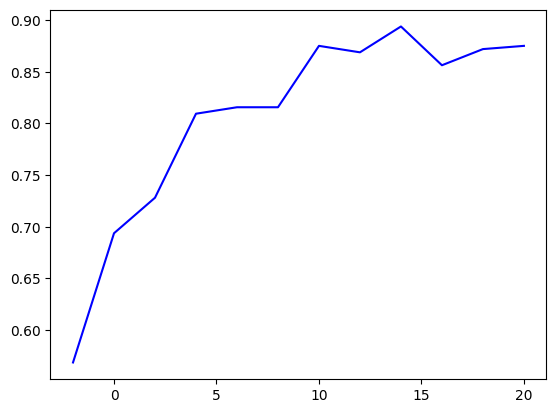

In [9]:
plt.plot(snrs, accuracy_tcn, color="blue")

### Save Model

In [35]:
ABS_PATH = '~/School/PFE/PFE-A2023-Classification-Modulation/data/nn/TCN'
dir_path = os.path.expanduser(ABS_PATH)
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
file_name = f'{timestamp}.pt'
full_path = os.path.join(dir_path, file_name)
print(full_path)

trainer_tcnn.save_model(file_name, dir_path)

/home/will/School/PFE/PFE-A2023-Classification-Modulation/data/nn/TCN/20231203_185237.pt
